In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#let's import the data

INFILE = r"C:\Users\jaysa\OneDrive\Desktop\Practical Machine Learning\HMEQ_Loss.csv"

TARGET_B = "TARGET_BAD_FLAG"
TARGET_L = "TARGET_LOSS_AMT"

df = pd.read_csv( INFILE )
df

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,NaN,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808717,0.0,16.0,36.112347
5956,0,NaN,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,NaN,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,NaN,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [3]:
#let's examine some data

print(df.dtypes)
df.describe().T

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object


,count,mean,std,min,25%,50%,75%,max
TARGET_BAD_FLAG,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
TARGET_LOSS_AMT,1189.0,13414.576955,10839.455965,224.000000,5639.000000,11003.000000,17634.000000,78987.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000


In [4]:
dt = df.dtypes
print( dt )
print( "-------\n")

#let's separate out the different data types
objList = []
intList = []
floatList = []
for i in dt.index :
    
    if i in ( [ TARGET_B, TARGET_L ] ) : continue
    if dt[i] in (["object"]) : objList.append( i )
    if dt[i] in (["float64"]) : floatList.append( i )
    if dt[i] in (["int64"]) : intList.append( i )
        
print(" OBJECTS ")
print(" ------- ")
for i in objList :
    print(i)

print("\n INTEGER ")
print(" ------- ")
for i in intList :
    print(i)

print("\n FLOAT ")
print(" ----- ")
for i in floatList :
    print(i)

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object
-------

 OBJECTS 
 ------- 
REASON
JOB

 INTEGER 
 ------- 
LOAN

 FLOAT 
 ----- 
MORTDUE
VALUE
YOJ
DEROG
DELINQ
CLAGE
NINQ
CLNO
DEBTINC


In [5]:
#let's take a look at the categorical/object variables. Perhaps there are certain jobs or reasons for seeking the loan
#that are riskier than others
for i in objList :
    print(" Class = ", i )
    g = df.groupby( i )
    print( g[i].count() )
    x = g[ TARGET_B ].mean()
    print( "Default Prob", x )
    print( " ................. ")
    x = g[ TARGET_L ].mean()
    print( "Loan Loss Amount", round(x,2) )
    print(" ===============\n\n\n ")

 Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Default Prob REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loan Loss Amount REASON
DebtCon    16005.16
HomeImp     8388.09
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
Default Prob JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loan Loss Amount JOB
Mgr        14141.54
Office     13475.30
Other      11570.10
ProfExe    14660.97
Sales      16421.45
Self       22232.36
Name: TARGET_LOSS_AMT, dtype: float64


 


DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


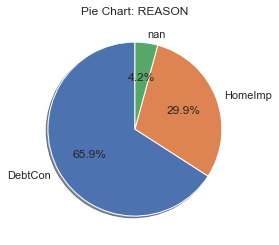

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64


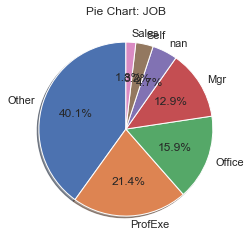

In [6]:
#A couple of things jump out immediately. Applicants that are either in sales or self employed are far more likely
#to default, and when they do default, the loan loss is higher. Office workers have the lowest probability of default
#which might indicate a higher level of job security.

#Let's visually represent the data for these  categories. Who loves pie.................charts?
for i in objList :
    x = df[ i ].value_counts(dropna=False)
    print( x )
    theLabels = x.axes[0].tolist()
    theSlices = list(x) 
    plt.pie( theSlices,
             labels=theLabels,
             startangle = 90,
             shadow=True,
             autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
    plt.show()

In [7]:
#When visualizing the data in pie charts, a couple of more things jump out. First, while the sales and self employed
#categories are more likely to default, they make up a very small percentage of total loans. We should be more concerned 
#with the nearly half of loans given from either the "Other" or "not given" job categories.

#Also, debt consolidation is twice as likely as other reasons for people pursuing this type of loan. 

#Let's take these categorical variables and impute some stuff. These NaN values are annoying. Fortunately, there is already
#an 'Other' category for jobs so we can add the NaN values to that category. Looking at the reason for loan, since the 
#majority of loans are for debt consolidation, we can safely assume the majority of NaN values are as well.

for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )   
    print( "MISSING = ", df[i].isna().sum() )
    print( "\n\n")
    
for i in objList :
    if df[i].isna().sum() == 0 : continue
    print( i ) 
    print("HAS MISSING")
    NAME = "IMP_"+i
    print( NAME ) 
    df[NAME] = df[i]
    df[NAME] = df[NAME].fillna(df[NAME].mode()[0] )
    print( "variable",i," has this many missing", df[i].isna().sum() )
    print( "variable",NAME," has this many missing", df[NAME].isna().sum() )
    g = df.groupby( NAME )
    print( g[NAME].count() )
    print( "\n\n")
    df = df.drop( i, axis=1 )

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252



JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279



REASON
HAS MISSING
IMP_REASON
variable REASON  has this many missing 252
variable IMP_REASON  has this many missing 0
IMP_REASON
DebtCon    4180
HomeImp    1780
Name: IMP_REASON, dtype: int64



JOB
HAS MISSING
IMP_JOB
variable JOB  has this many missing 279
variable IMP_JOB  has this many missing 0
IMP_JOB
Mgr         767
Office      948
Other      2667
ProfExe    1276
Sales       109
Self        193
Name: IMP_JOB, dtype: int64





In [8]:
#Now our imputed reason and imputed job variables have no missing values. Let's rank the job tiers as a kind of corporate 
#ladder and create associated flag variables for each. In this ladder, the ProfExe is on top, followed by the Mgr, then
#Office, next Sales, Self, and finally Other.

print( df["IMP_JOB"].unique() )

df["y_IMP_JOB_6"] = (df.IMP_JOB.isin( ["ProfExe"] ) + 0 )
df["y_IMP_JOB_5"] = (df.IMP_JOB.isin( ["ProfExe","Mgr"] ) + 0)
df["y_IMP_JOB_4"] = (df.IMP_JOB.isin( ["ProfExe","Mgr","Office"] ) + 0)
df["y_IMP_JOB_3"] = (df.IMP_JOB.isin( ["ProfExe","Mgr","Office","Sales"] ) + 0)
df["y_IMP_JOB_2"] = (df.IMP_JOB.isin( ["ProfExe","Mgr","Office","Sales","Self"] ) + 0)
df["y_IMP_JOB_1"] = (df.IMP_JOB.isin( ["ProfExe","Mgr","Office","Sales","Self","Other"] ) + 0)
df = df.drop( "IMP_JOB", axis=1 )

print( df.head().T )


for i in ["y_IMP_JOB_6","y_IMP_JOB_5","y_IMP_JOB_4","y_IMP_JOB_3","y_IMP_JOB_2","y_IMP_JOB_1"] :
    print(" Class = ", i )
    g = df.groupby( i )
    x = g[ TARGET_B ].mean()
    print( "Defualt Prob", x )
    print( " ................. ")
    x = g[ TARGET_L ].mean()
    x = g[ TARGET_L ].median()
    print( "Loan Loss Amount", x )
    print(" ===============\n\n\n ")



['Other' 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
                       0        1        2        3        4
TARGET_BAD_FLAG        1        1        1        1        0
TARGET_LOSS_AMT      641     1109      767     1425      NaN
LOAN                1100     1300     1500     1500     1700
MORTDUE            25860    70053    13500      NaN    97800
VALUE              39025    68400    16700      NaN   112000
YOJ                 10.5        7        4      NaN        3
DEROG                  0        0        0      NaN        0
DELINQ                 0        2        0      NaN        0
CLAGE            94.3667  121.833  149.467      NaN  93.3333
NINQ                   1        0        1      NaN        0
CLNO                   9       14       10      NaN       14
DEBTINC              NaN      NaN      NaN      NaN      NaN
IMP_REASON       HomeImp  HomeImp  HomeImp  DebtCon  HomeImp
y_IMP_JOB_6            0        0        0        0        0
y_IMP_JOB_5            0        0  

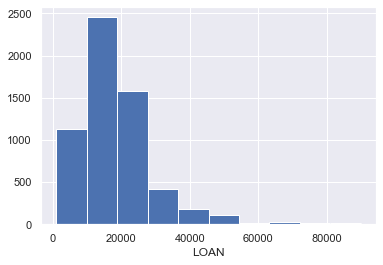

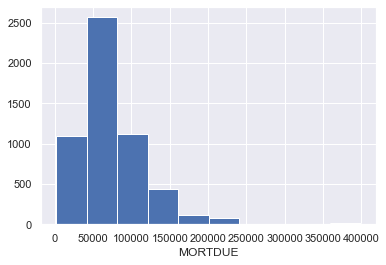

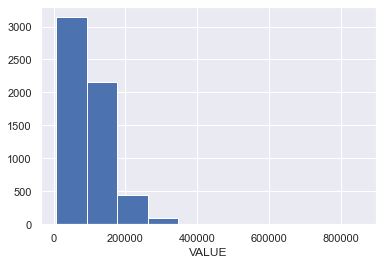

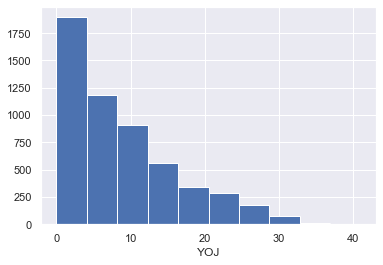

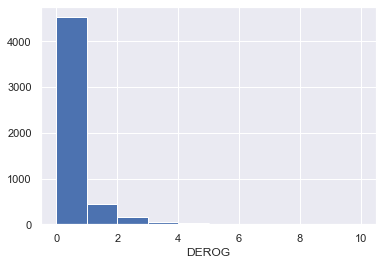

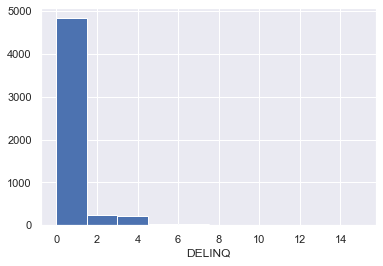

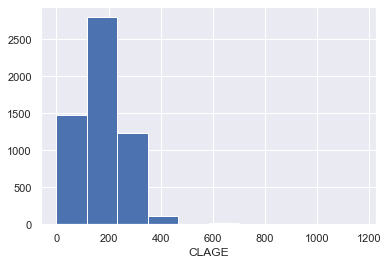

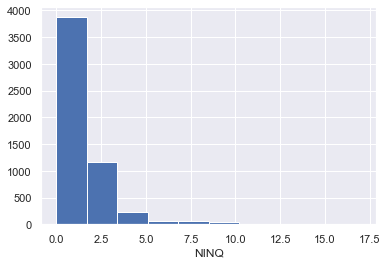

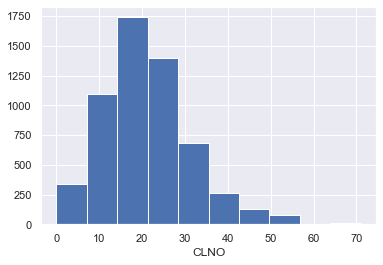

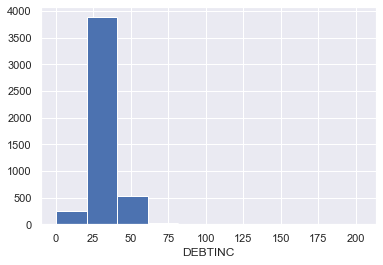

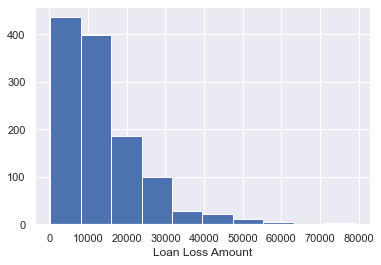

In [10]:
#This doesn't give us much insight as far as who on the corporate ladder is more likely to default, but it does give the 
#data numerical values for categorical variables.

#Let's check the other data types for outliers using histograms!

for i in intList :
    plt.hist( df[ i ] )
    plt.xlabel( i )
    plt.show()

for i in floatList :
    plt.hist( df[ i ] )
    plt.xlabel( i )
    plt.show()
    
plt.hist( df[ TARGET_L ] )
plt.xlabel( "Loan Loss Amount" )
plt.show()

#Most of the data in the histograms actually looks pretty good with a lot of normal distributions. There is potentially 
#an outlier in the loan amount.

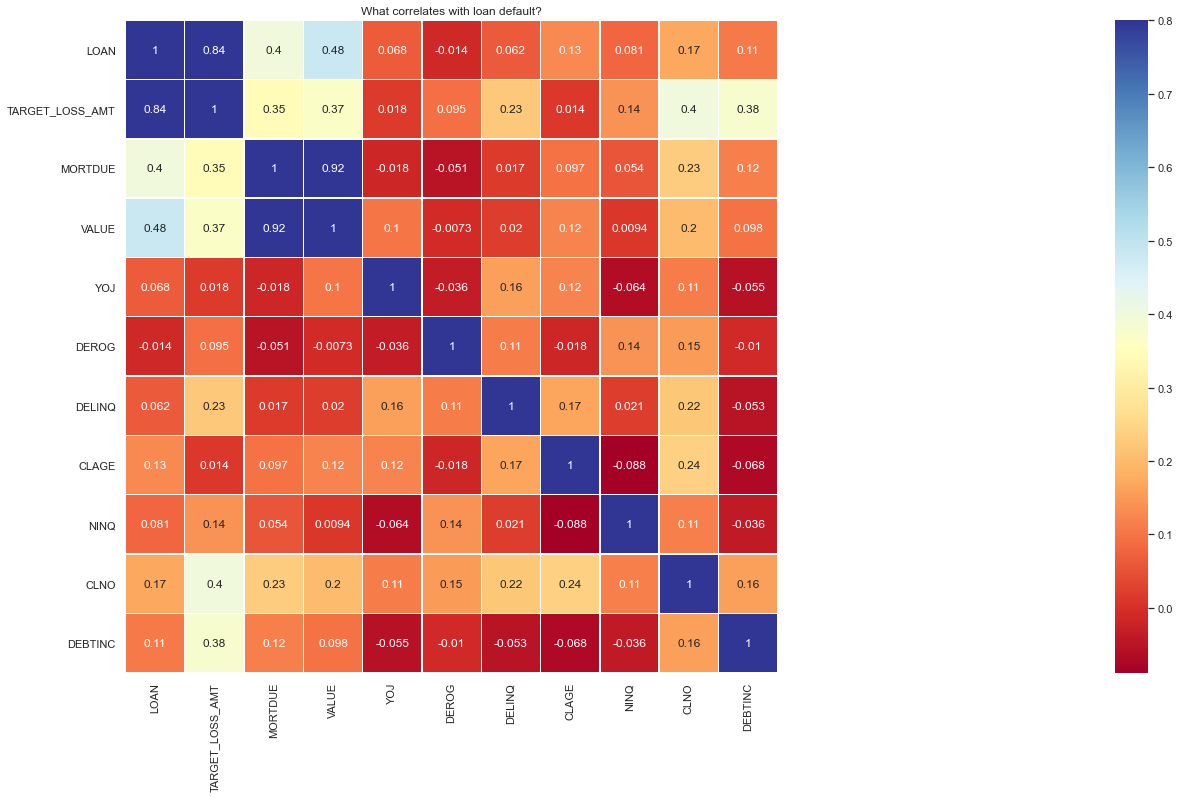

In [20]:
#BINGO FUN! Let's have some fun with correlated variables. For loans that default, let's see what other variables
#could be correlated with default.

df.drop(df.index[df['TARGET_BAD_FLAG'] == 0], inplace=True) #Let's only look at loans that ended up in default.

columns = ['LOAN', 'TARGET_LOSS_AMT', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG','DELINQ','CLAGE','NINQ','CLNO','DEBTINC']
df_corr = df[columns]
# running the correlation
df_corr.corr()

# setting up the heatmap
corrmat = df_corr.corr()

# set the figure size
f, ax = plt.subplots(figsize=(121, 12))

# pass the data and set the parameters
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, cmap='RdYlBu', linewidths=.5 )
plt.title('What correlates with loan default?')


plt.savefig('Correlation Loan Defaults')

In [ ]:
#Looking at the heat map, some details become fairly obvious. The larger the loan given, the larger the target loss was for
#defualted loans.It also makes sense that the higher the value of the house, it is also likely the balance of the mortgage
#is also higher.
#Let's talk about some of the more interesting correlated variables. The conventional wisdom of years on the job
#is indeed a great predictor of risk. There are strong negative correlations with derogatory marks, debt to income ratio,
#and number of inquiries. Lots of time at the same job equates to stability and less risk.
#Something I found interesting is that the number of open credit lines positively corrleates with loan loss amount. This
#also makes intuituitive since as many people are using HMEQ to consolidate debt. People with many credit lines using this
#loan indicate more risk and a higher loss amount.
#Finally, the convential wisdom regarding number of inquiries for credit looks to be overstated. There is no strong 
#correlation with variables such as target loss amount or derogatory marks. Only strong negative correlations with years on
#the job and age of credit. This makes sense as someone who has well-established accounts would be less likely to be looking
#for new credit accounts. It may be time to put the conventional wisdom regarding inquiries to bed.